In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1ebbf638160>)

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
from glove import Corpus, Glove

corpus = Corpus() 

corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [5]:
print(glove.most_similar("man"))

[('woman', 0.9657961394078736), ('guy', 0.8757751502330507), ('girl', 0.8554423324971665), ('kid', 0.8380133603902165)]


In [6]:
print(glove.most_similar("boy"))

[('girl', 0.9318928179149972), ('kid', 0.8352003540860825), ('woman', 0.8299735497377501), ('man', 0.8188959728378173)]


In [7]:
print(glove.most_similar("university"))

[('harvard', 0.8887497984585605), ('mit', 0.8632949594206213), ('cambridge', 0.8445834484583912), ('stanford', 0.8417161803527143)]


In [8]:
print(glove.most_similar("water"))

[('air', 0.8319627653273226), ('clean', 0.8299467807641268), ('food', 0.8294406191240258), ('fresh', 0.8238524125042404)]


In [9]:
print(glove.most_similar("physics"))

[('chemistry', 0.8926633667539641), ('economics', 0.8769555898802347), ('mathematics', 0.8682921818331769), ('beauty', 0.8641507135961984)]


In [10]:
print(glove.most_similar("muscle"))

[('tissue', 0.8461043566623111), ('nerve', 0.8331863571689311), ('stem', 0.785594592438728), ('skeletal', 0.7714549464225826)]


In [11]:
print(glove.most_similar("clean"))

[('water', 0.8299467807641271), ('fresh', 0.8273785415363756), ('wind', 0.8165420381096209), ('heat', 0.8091495300985289)]


In [12]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [13]:
model.wv.most_similar("electrofishing")

KeyError: "Key 'electrofishing' not present in vocabulary"

In [14]:
from gensim.models import FastText

model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [15]:
model.wv.most_similar("electrofishing")

[('electrolyte', 0.8689337968826294),
 ('electrolux', 0.868766725063324),
 ('electro', 0.8507804274559021),
 ('electroshock', 0.8440813422203064),
 ('electroencephalogram', 0.8408138155937195),
 ('electrochemical', 0.8338688611984253),
 ('electrogram', 0.8297443985939026),
 ('electron', 0.8160391449928284),
 ('electronic', 0.8159158229827881),
 ('electrons', 0.8120592832565308)]

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1,0,0,1,1,0,1]

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index)
print('단어 집합 :',vocab_size)

단어 집합 : 15


# 단어 집합의 크기가 wiki의 내용과는 달리 15여서 이후에 진행이 안되므로 이후에는 vocab+1을 사용했습니다.

In [4]:
X_encoded = tokenizer.texts_to_sequences(sentences)
print('정수 인코딩 결과 :',X_encoded)

정수 인코딩 결과 : [[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [5]:
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


In [6]:
X_train = pad_sequences(X_encoded,maxlen=max_len,padding='post')
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

패딩 결과 :
[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten
embedding_dim = 4
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6894 - acc: 0.4286
Epoch 2/100
1/1 - 0s - loss: 0.6877 - acc: 0.4286
Epoch 3/100
1/1 - 0s - loss: 0.6860 - acc: 0.4286
Epoch 4/100
1/1 - 0s - loss: 0.6844 - acc: 0.5714
Epoch 5/100
1/1 - 0s - loss: 0.6827 - acc: 0.5714
Epoch 6/100
1/1 - 0s - loss: 0.6811 - acc: 0.5714
Epoch 7/100
1/1 - 0s - loss: 0.6794 - acc: 0.5714
Epoch 8/100
1/1 - 0s - loss: 0.6778 - acc: 0.5714
Epoch 9/100
1/1 - 0s - loss: 0.6761 - acc: 0.5714
Epoch 10/100
1/1 - 0s - loss: 0.6745 - acc: 0.5714
Epoch 11/100
1/1 - 0s - loss: 0.6728 - acc: 0.5714
Epoch 12/100
1/1 - 0s - loss: 0.6712 - acc: 0.5714
Epoch 13/100
1/1 - 0s - loss: 0.6695 - acc: 0.5714
Epoch 14/100
1/1 - 0s - loss: 0.6679 - acc: 0.5714
Epoch 15/100
1/1 - 0s - loss: 0.6662 - acc: 0.5714
Epoch 16/100
1/1 - 0s - loss: 0.6646 - acc: 0.5714
Epoch 17/100
1/1 - 0s - loss: 0.6629 - acc: 0.5714
Epoch 18/100
1/1 - 0s - loss: 0.6612 - acc: 0.5714
Epoch 19/100
1/1 - 0s - loss: 0.6596 - acc: 0.5714
Epoch 20/100
1/1 - 0s - loss: 0.6579 - a

In [8]:
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [9]:
print(y_train)

[1 0 0 1 1 0 1]


In [10]:
from urllib.request import urlretrieve,urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [11]:
import numpy as np
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    
    word_vector_arr = np.asarray(word_vector[1:],dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [16]:
print(embedding_dict['respectable'])
print('벡터의 차원 수 :',len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

In [18]:
embedding_matrix = np.zeros((vocab_size+1,100))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (16, 100)


In [19]:
print(tokenizer.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [20]:
print('단어 great의 맵핑된 정수 :',tokenizer.word_index['great'])

단어 great의 맵핑된 정수 : 2


In [21]:
print(embedding_dict['great'])

[-0.013786   0.38216    0.53236    0.15261   -0.29694   -0.20558
 -0.41846   -0.58437   -0.77355   -0.87866   -0.37858   -0.18516
 -0.128     -0.20584   -0.22925   -0.42599    0.3725     0.26077
 -1.0702     0.62916   -0.091469   0.70348   -0.4973    -0.77691
  0.66045    0.09465   -0.44893    0.018917   0.33146   -0.35022
 -0.35789    0.030313   0.22253   -0.23236   -0.19719   -0.0053125
 -0.25848    0.58081   -0.10705   -0.17845   -0.16206    0.087086
  0.63029   -0.76649    0.51619    0.14073    1.019     -0.43136
  0.46138   -0.43585   -0.47568    0.19226    0.36065    0.78987
  0.088945  -2.7814    -0.15366    0.01015    1.1798     0.15168
 -0.050112   1.2626    -0.77527    0.36031    0.95761   -0.11385
  0.28035   -0.02591    0.31246   -0.15424    0.3778    -0.13599
  0.2946    -0.31579    0.42943    0.086969   0.019169  -0.27242
 -0.31696    0.37327    0.61997    0.13889    0.17188    0.30363
 -1.2776     0.044423  -0.52736   -0.88536   -0.19428   -0.61947
 -0.10146   -0.26301  

In [22]:
for word, index in tokenizer.word_index.items():
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [25]:
embedding_matrix[2]

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten
output_dim = 100
model = Sequential()
e = Embedding(vocab_size+1,output_dim,weights=[embedding_matrix],input_length=max_len,trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.9238 - acc: 0.0000e+00
Epoch 2/100
1/1 - 0s - loss: 0.8973 - acc: 0.0000e+00
Epoch 3/100
1/1 - 0s - loss: 0.8716 - acc: 0.0000e+00
Epoch 4/100
1/1 - 0s - loss: 0.8467 - acc: 0.0000e+00
Epoch 5/100
1/1 - 0s - loss: 0.8227 - acc: 0.1429
Epoch 6/100
1/1 - 0s - loss: 0.7995 - acc: 0.1429
Epoch 7/100
1/1 - 0s - loss: 0.7773 - acc: 0.2857
Epoch 8/100
1/1 - 0s - loss: 0.7558 - acc: 0.2857
Epoch 9/100
1/1 - 0s - loss: 0.7353 - acc: 0.2857
Epoch 10/100
1/1 - 0s - loss: 0.7156 - acc: 0.2857
Epoch 11/100
1/1 - 0s - loss: 0.6966 - acc: 0.4286
Epoch 12/100
1/1 - 0s - loss: 0.6785 - acc: 0.4286
Epoch 13/100
1/1 - 0s - loss: 0.6611 - acc: 0.4286
Epoch 14/100
1/1 - 0s - loss: 0.6444 - acc: 0.4286
Epoch 15/100
1/1 - 0s - loss: 0.6283 - acc: 0.4286
Epoch 16/100
1/1 - 0s - loss: 0.6129 - acc: 0.5714
Epoch 17/100
1/1 - 0s - loss: 0.5981 - acc: 0.5714
Epoch 18/100
1/1 - 0s - loss: 0.5838 - acc: 0.5714
Epoch 19/100
1/1 - 0s - loss: 0.5701 - acc: 0.7143
Epoch 20/100
1/1 - 0s - 

In [35]:
import gensim

urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

print('모델의 크기(shape) :',word2vec_model.vectors.shape) # 모델의 크기 확인

ValueError: not enough values to unpack (expected 2, got 0)

# 2022.06.21 기준  url파일이 없어서 진행 불가

In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

In [ ]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [ ]:
for word,index in tokenizer.word_index.items():
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [ ]:
print('단어 nice의 맵핑된 정수 :',tokenizer.word_index['nice'])

In [ ]:
print(embedding_matrix[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

In [1]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2022-06-21 16:14:02,350 - word2vec2tensor - INFO - running C:\Users\sunho\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input eng_w2v --output eng_w2v
2022-06-21 16:14:02,350 - keyedvectors - INFO - loading projection weights from eng_w2v
2022-06-21 16:14:05,099 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-06-21T16:14:05.097651', 'gensim': '4.2.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}
2022-06-21 16:14:06,823 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2022-06-21 16:14:06,823 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2022-06-21 16:14:06,824 - word2vec2tensor - INFO - finished running word2vec2tensor.py


# https://projector.tensorflow.org/ 시각화 사이트

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\sunho\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")
df = pd.read_csv("data.csv")
print('전체 문서의 수 :',len(df))

전체 문서의 수 : 2382


In [3]:
df[:5]

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [4]:
def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)
def make_lower_case(text):
    return text.lower()
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
df['cleaned'] = df['Desc'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punctuation)
df['cleaned'] = df.cleaned.apply(remove_html)

In [5]:
df['cleaned'][:5]

0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: cleaned, dtype: object

In [6]:
df['cleaned'].replace('',np.nan,inplace=True)
df = df[df['cleaned'].notna()]
print('전체 문서의 수 :',len(df))

전체 문서의 수 : 2381


In [7]:
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

In [8]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")

word2vec_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
word2vec_model.build_vocab(corpus)
word2vec_model.intersect_word2vec_format(fname='GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)

C:\Users\sunho\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


ValueError: not enough values to unpack (expected 2, got 0)

In [9]:
def get_document_vectors(document_list):
    document_embedding_list= []
    
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in word2vec_model.wv.vocab:
                count += 1
                if doc2vec is None:
                    doc2vec = word2vec_model[word]
                else:
                    doc2vec = doc2vec + word2vec_model[word]
        if doc2vec is not None:
            doc2vec = doc2vec/count
            document_embedding_list.append(doc2vec)
    return document_embedding_list

In [10]:
document_embedding_list = get_document_vectors(df['cleaned'])
print('문서 벡터의 수 :',len(document_embedding_list))

<ipython-input-9-78ada907f37e>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  doc2vec = word2vec_model[word]
<ipython-input-9-78ada907f37e>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  doc2vec = doc2vec + word2vec_model[word]


문서 벡터의 수 : 2381


In [11]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)

코사인 유사도 매트릭스의 크기 : (2381, 2381)


In [12]:
def recommendations(title):
    books = df[['title','image_link']]
    
    indices = pd.Series(df.index,index=df['title']).drop_duplicates()
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x : x[1],reverse= True)
    sim_scores = sim_scores[1:6]
    
    book_indices = [i[0] for i in sim_scores]
    
    recommend = books.iloc[book_indices].reset_index(drop=True)
    fig = plt.figure(figsize=(20,30))
    
    for index,row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1,5,index+1)
        plt.imshow(img)
        plt.title(row['title'])

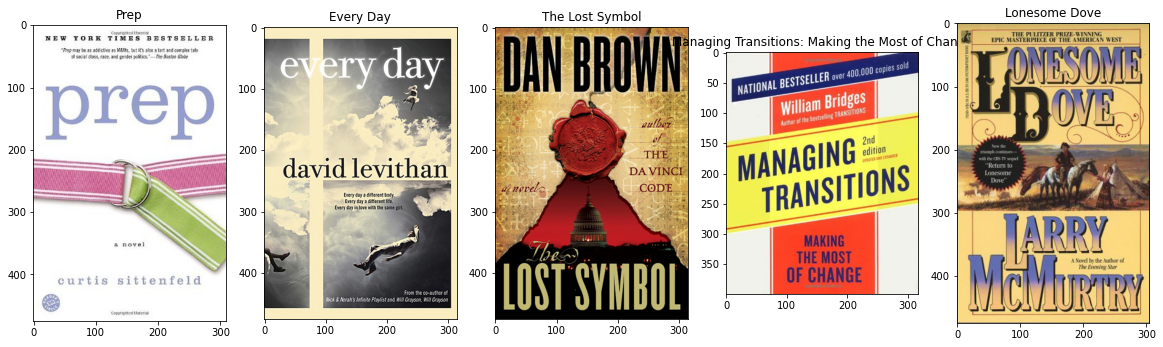

In [13]:
recommendations("The Da Vinci Code")

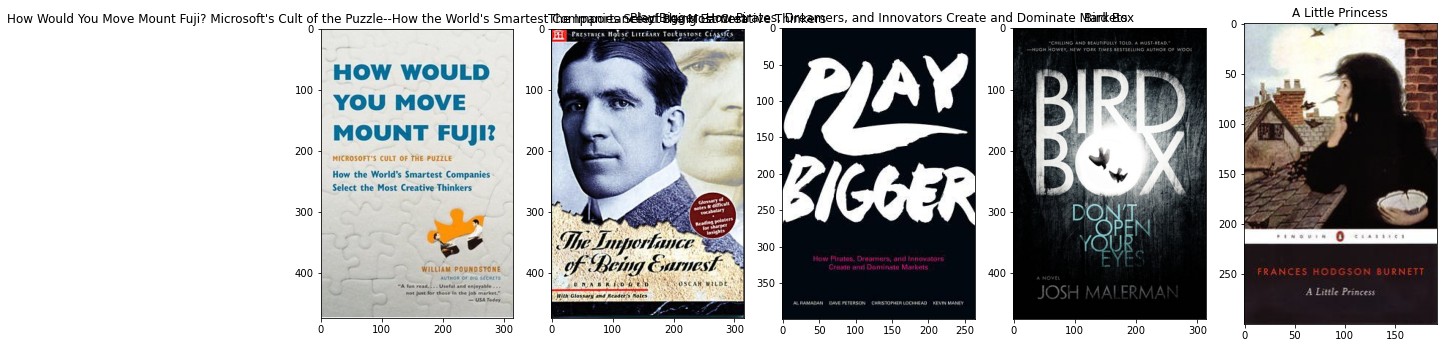

In [14]:
recommendations("The Murder of Roger Ackroyd")

In [15]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
vocab_size = 20000

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=vocab_size)
print('훈련용 리뷰 개수 :',len(X_train))
print('테스트용 리뷰 개수 :',len(X_test))

17473536/17464789 [==============================] - 0s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000


In [17]:
print('훈련 데이터의 첫번째 샘플 :',X_train[0])
print('훈련 데이터의 첫번째 샘플의 레이블 :',y_train[0])

훈련 데이터의 첫번째 샘플 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
훈련 데이터의 첫번째 샘플의 레이블 : 1


In [18]:
max_len = 400

X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (25000, 400)
X_test의 크기(shape) : (25000, 400)


In [20]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim))

model.add(GlobalAveragePooling1D())
model.add(Dense(1,activation='sigmoid'))

es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
mc = ModelCheckpoint("embedding_average_model.h5",monitor='val_acc',mode='max',verbose=1,save_best_only=True)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(X_train,y_train,batch_size=32,epochs=10,callbacks=[es,mc],validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 5ms/step - loss: 0.6298 - acc: 0.7190 - val_loss: 0.5216 - val_acc: 0.8216

Epoch 00001: val_acc improved from -inf to 0.82160, saving model to embedding_average_model.h5
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4312 - acc: 0.8566 - val_loss: 0.3793 - val_acc: 0.8676

Epoch 00002: val_acc improved from 0.82160 to 0.86760, saving model to embedding_average_model.h5
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3195 - acc: 0.8911 - val_loss: 0.3235 - val_acc: 0.8786

Epoch 00003: val_acc improved from 0.86760 to 0.87860, saving model to embedding_average_model.h5
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2625 - acc: 0.9090 - val_loss: 0.2988 - val_acc: 0.8838

Epoch 00004: val_acc improved from 0.87860 to 0.88380, saving model to embedding_average_model.h5
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.22

# EarlyStopping
### mode : performance 최소화 시킬시 min, 최대화 시킬시  max
### patience 성능 증가하지 않는 epoch 몇번 반복할지 정함

# ModelCheckPoint : 정의한 조건 만족시 weight값 중간값 저장
### mode : performance 최소화 시킬시 min, 최대화 시킬시  max
### save_best_only : 제일 좋은 상황 저장

In [21]:
loaded_model = load_model("embedding_average_model.h5")
print('\n 테스트 정확도 : %.4f'%(loaded_model.evaluate(X_test,y_test)[1]))

782/782 [==============================] - 2s 2ms/step - loss: 0.2854 - acc: 0.8874

 테스트 정확도 : 0.8874
